In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BanditRec.settings import NewsSimulationSetting, NewsSimulationSetting2, SimpleSetting
from BanditRec.setting import SettingConfig
from BanditRec.agents import RandomAgent, EpsGreedyAgent, ThompsonAgent, FroomleAgent, DynamicFroomleAgent, UCBAgent, CheatingFroomleAgent, PopAgent, OPGAgent
from BanditRec.agents import CTREstimator, WindowedCTREstimator, ImpressionWindowedCTREstimator, WeightedCTREstimator, DelayedWeightedCTREstimator
from BanditRec.simulator import Simulator

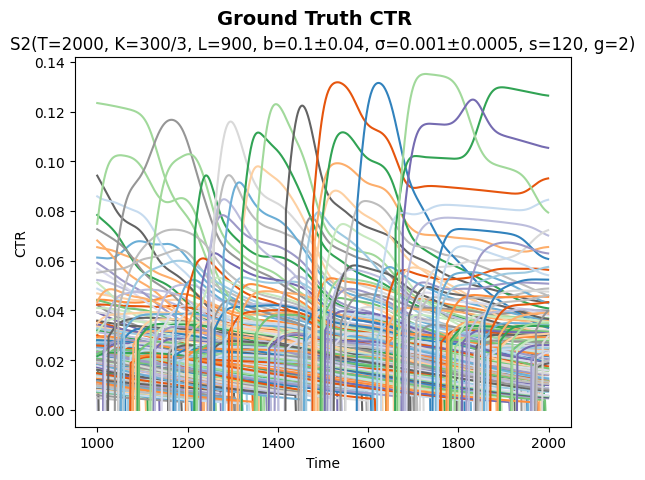

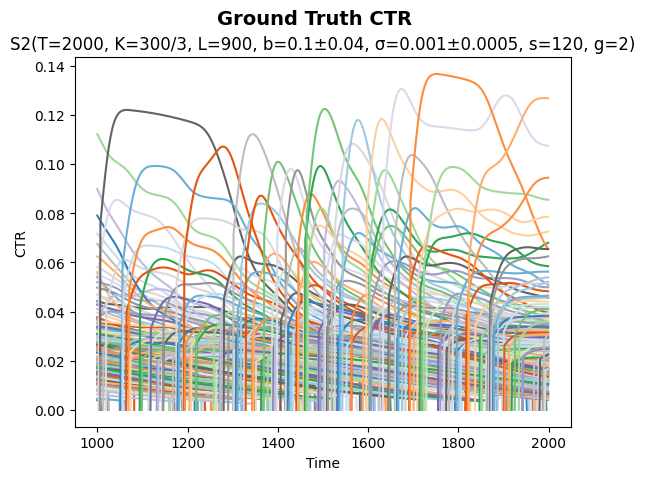

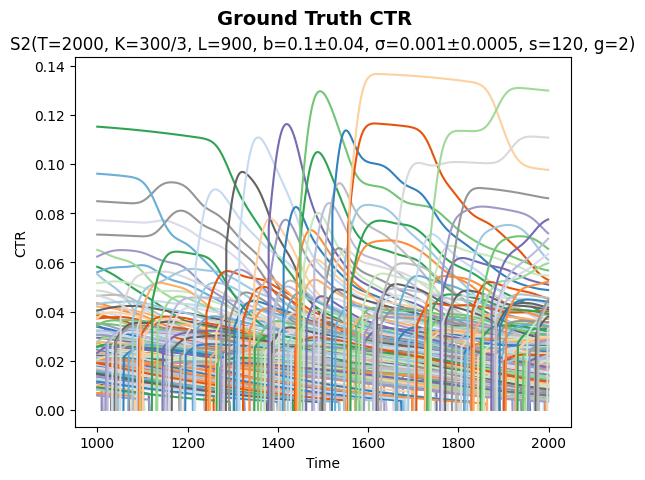

In [3]:
setting = NewsSimulationSetting2(
    SettingConfig(
        episode_count=2000, 
        item_count=300, 
        k=3, 
        episode_length=1
    ),
    lifetime=900,
    ctr_base=0.1,
    ctr_fuzz=0.04,
    sigma_base=0.001,
    sigma_fuzz=0.0005,
    smoothing=120,
    global_evolution=2
)
setting.reseed(1)
setting.visualize(tmin=1000)
setting.reseed(2)
setting.visualize(tmin=1000)
setting.reseed(0)
setting.visualize(tmin=1000)

In [22]:
def experiment1():
    sim1 = Simulator(run_count=100, seed_change_interval=1)
    sim1.set_setting(setting)
    sim1.set_episode_length(5)
    sim1.run_oracle()
    sim1.run_agent(RandomAgent, {})
    sim1.run_agent(ThompsonAgent, {'estimator': CTREstimator()})
    sim1.run_agent(ThompsonAgent, {'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(ThompsonAgent, {'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(ThompsonAgent, {'estimator': WindowedCTREstimator(window_size=10000)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0.2, 'estimator': CTREstimator()})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0.2, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0.2, 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0.2, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim1.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    sim1.results.ctrs(tmin=1000, relative=True)
    sim1.results.create_regret_plot(tmin=1000)
    
    sim2 = Simulator(run_count=100, seed_change_interval=1)
    sim2.set_setting(setting)
    sim2.set_episode_length(50)
    sim2.run_oracle()
    sim2.run_agent(RandomAgent, {})
    sim2.run_agent(ThompsonAgent, {'estimator': CTREstimator()})
    sim2.run_agent(ThompsonAgent, {'estimator': WindowedCTREstimator(window_size=1000)})
    sim2.run_agent(ThompsonAgent, {'estimator': WindowedCTREstimator(window_size=10000)})
    sim2.run_agent(ThompsonAgent, {'estimator': WindowedCTREstimator(window_size=100000)})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0.1, 'estimator': CTREstimator()})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0.1, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0.1, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0.1, 'estimator': WindowedCTREstimator(window_size=100000)})
    sim2.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    sim2.results.ctrs(tmin=1000, relative=True)
    sim2.results.create_regret_plot(tmin=1000)
    
    sim3 = Simulator(run_count=25, seed_change_interval=0)
    sim3.set_setting(setting)
    sim3.set_episode_length(5)
    sim3.run_oracle()
    sim3.run_agent(ThompsonAgent, {'estimator': CTREstimator()})
    sim3.run_agent(ThompsonAgent, {'estimator': WindowedCTREstimator(window_size=1000)})
    sim3.run_agent(EpsGreedyAgent, {'eps': 0.2, 'estimator': CTREstimator()})
    sim3.run_agent(EpsGreedyAgent, {'eps': 0.2, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim3.results.create_impressions_plot(tmin=1000, show_setting=False)
    
    sim4 = Simulator(run_count=25, seed_change_interval=0)
    sim4.set_setting(setting)
    sim4.set_episode_length(50)
    sim4.run_oracle()
    sim4.run_agent(ThompsonAgent, {'estimator': CTREstimator()})
    sim4.run_agent(ThompsonAgent, {'estimator': WindowedCTREstimator(window_size=10000)})
    sim4.run_agent(EpsGreedyAgent, {'eps': 0.1, 'estimator': CTREstimator()})
    sim4.run_agent(EpsGreedyAgent, {'eps': 0.1, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim4.results.create_impressions_plot(tmin=1000, show_setting=False)
    
# experiment1()

In [7]:
def experiment2():
    sim1 = Simulator(run_count=100, seed_change_interval=1)
    sim1.set_setting(setting)
    sim1.set_episode_length(5)
    sim1.run_oracle()
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.05, starting_value=0.1)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.1)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.05, starting_value=0.2)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.2)})
    sim1.run_agent(FroomleAgent, {'boost_n': 10, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim1.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim1.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim1.run_agent(FroomleAgent, {'boost_n': 10, 'boost_ctr': 0.2, 'estimator': CTREstimator()})
    sim1.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.2, 'estimator': CTREstimator()})
    sim1.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.2, 'estimator': CTREstimator()})
    sim1.run_agent(FroomleAgent, {'boost_n': 10, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim1.run_agent(FroomleAgent, {'boost_n': 100, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim1.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim1.run_agent(FroomleAgent, {'boost_n': 10, 'boost_rank': 3, 'estimator': CTREstimator()})
    sim1.run_agent(FroomleAgent, {'boost_n': 100, 'boost_rank': 3, 'estimator': CTREstimator()})
    sim1.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_rank': 3, 'estimator': CTREstimator()})
    sim1.run_agent(FroomleAgent, {'boost_n': 1, 'boost_ctr': 0.1, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(FroomleAgent, {'boost_n': 5, 'boost_ctr': 0.1, 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(FroomleAgent, {'boost_n': 10, 'boost_ctr': 0.1, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim1.run_agent(FroomleAgent, {'boost_n': 1, 'boost_rank': 1, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(FroomleAgent, {'boost_n': 5, 'boost_rank': 1, 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(FroomleAgent, {'boost_n': 10, 'boost_rank': 1, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 10, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 10, 'boost_ctr': 0.2, 'estimator': CTREstimator()})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_ctr': 0.2, 'estimator': CTREstimator()})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.2, 'estimator': CTREstimator()})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 10, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 1000, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 10, 'boost_rank': 3, 'estimator': CTREstimator()})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_rank': 3, 'estimator': CTREstimator()})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 1000, 'boost_rank': 3, 'estimator': CTREstimator()})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 1, 'boost_ctr': 0.1, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 5, 'boost_ctr': 0.1, 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 10, 'boost_ctr': 0.1, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 1, 'boost_rank': 1, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 5, 'boost_rank': 1, 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(DynamicFroomleAgent, {'boost_n': 10, 'boost_rank': 1, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim1.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    
    sim2 = Simulator(run_count=100, seed_change_interval=1)
    sim2.set_setting(setting)
    sim2.set_episode_length(5)
    sim2.run_oracle()
    sim2.run_agent(ThompsonAgent, {'estimator': CTREstimator()})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0.2, 'estimator': CTREstimator()})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.1)})
    sim2.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim2.run_agent(FroomleAgent, {'boost_n': 100, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim2.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim2.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim2.results.ctrs(tmin=1000, relative=True, sort=True)
    sim2.results.create_regret_plot(tmin=1000)
    
    sim3 = Simulator(run_count=100, seed_change_interval=1)
    sim3.set_setting(setting)
    sim3.set_episode_length(50)
    sim3.run_oracle()
    sim3.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.05, starting_value=0.1)})
    sim3.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.1)})
    sim3.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.05, starting_value=0.2)})
    sim3.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.2)})
    sim3.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim3.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim3.run_agent(FroomleAgent, {'boost_n': 10000, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim3.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.2, 'estimator': CTREstimator()})
    sim3.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.2, 'estimator': CTREstimator()})
    sim3.run_agent(FroomleAgent, {'boost_n': 10000, 'boost_ctr': 0.2, 'estimator': CTREstimator()})
    sim3.run_agent(FroomleAgent, {'boost_n': 100, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim3.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim3.run_agent(FroomleAgent, {'boost_n': 10000, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim3.run_agent(FroomleAgent, {'boost_n': 100, 'boost_rank': 3, 'estimator': CTREstimator()})
    sim3.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_rank': 3, 'estimator': CTREstimator()})
    sim3.run_agent(FroomleAgent, {'boost_n': 10000, 'boost_rank': 3, 'estimator': CTREstimator()})
    sim3.run_agent(FroomleAgent, {'boost_n': 10, 'boost_ctr': 0.1, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim3.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.1, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim3.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.1, 'estimator': WindowedCTREstimator(window_size=100000)})
    sim3.run_agent(FroomleAgent, {'boost_n': 10, 'boost_rank': 1, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim3.run_agent(FroomleAgent, {'boost_n': 100, 'boost_rank': 1, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim3.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_rank': 1, 'estimator': WindowedCTREstimator(window_size=100000)})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 10000, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_ctr': 0.2, 'estimator': CTREstimator()})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.2, 'estimator': CTREstimator()})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 10000, 'boost_ctr': 0.2, 'estimator': CTREstimator()})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 1000, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 10000, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_rank': 3, 'estimator': CTREstimator()})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 1000, 'boost_rank': 3, 'estimator': CTREstimator()})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 10000, 'boost_rank': 3, 'estimator': CTREstimator()})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 10, 'boost_ctr': 0.1, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_ctr': 0.1, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.1, 'estimator': WindowedCTREstimator(window_size=100000)})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 10, 'boost_rank': 1, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_rank': 1, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim3.run_agent(DynamicFroomleAgent, {'boost_n': 1000, 'boost_rank': 1, 'estimator': WindowedCTREstimator(window_size=100000)})
    sim3.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    
    sim4 = Simulator(run_count=100, seed_change_interval=1)
    sim4.set_setting(setting)
    sim4.set_episode_length(50)
    sim4.run_oracle()
    sim4.run_agent(ThompsonAgent, {'estimator': CTREstimator()})
    sim4.run_agent(EpsGreedyAgent, {'eps': 0.1, 'estimator': CTREstimator()})
    sim4.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.1)})
    sim4.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim4.run_agent(FroomleAgent, {'boost_n': 100, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim4.run_agent(DynamicFroomleAgent, {'boost_n': 10000, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim4.run_agent(DynamicFroomleAgent, {'boost_n': 1000, 'boost_rank': 1, 'estimator': CTREstimator()})
    sim4.results.ctrs(tmin=1000, relative=True, sort=True)
    sim4.results.create_regret_plot(tmin=1000)
    
    sim5 = Simulator(run_count=25, seed_change_interval=0)
    sim5.set_setting(setting)
    sim5.set_episode_length(5)
    sim5.run_oracle()
    sim5.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.1)})
    sim5.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim5.run_agent(DynamicFroomleAgent, {'boost_n': 100, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim5.results.create_impressions_plot(tmin=1000, show_setting=False)
    sim5.results.create_estimates_plot(tmin=1000)
    
    sim6 = Simulator(run_count=25, seed_change_interval=0)
    sim6.set_setting(setting)
    sim6.set_episode_length(50)
    sim6.run_oracle()
    sim6.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.1)})
    sim6.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim6.run_agent(DynamicFroomleAgent, {'boost_n': 10000, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim6.results.create_impressions_plot(tmin=1000, show_setting=False)
    sim6.results.create_estimates_plot(tmin=1000)
    
# experiment2()

In [11]:
def experiment3():
    sim1 = Simulator(run_count=100, seed_change_interval=1)
    sim1.set_setting(setting)
    sim1.set_episode_length(5)
    sim1.run_oracle()
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.02, starting_value=0.05)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.05)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.005, starting_value=0.05)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.03)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.06)})
    sim1.run_agent(ThompsonAgent, {'prior': (1, 10)})
    sim1.run_agent(ThompsonAgent, {'prior': (1, 100)})
    sim1.run_agent(ThompsonAgent, {'prior': (1, 1000)})
    sim1.run_agent(ThompsonAgent, {'prior': (1, 10), 'estimator': WindowedCTREstimator(window_size=500)})
    sim1.run_agent(ThompsonAgent, {'prior': (1, 100), 'estimator': WindowedCTREstimator(window_size=500)})
    sim1.run_agent(ThompsonAgent, {'prior': (1, 1000), 'estimator': WindowedCTREstimator(window_size=500)})
    sim1.run_agent(ThompsonAgent, {'prior': (1, 10), 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(ThompsonAgent, {'prior': (1, 100), 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(ThompsonAgent, {'prior': (1, 1000), 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(ThompsonAgent, {'prior': (1, 10), 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(ThompsonAgent, {'prior': (1, 100), 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(ThompsonAgent, {'prior': (1, 1000), 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(FroomleAgent, {'boost_n': 10, 'boost_ctr': 0.05})
    sim1.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.05})
    sim1.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.05})
    sim1.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.05})
    sim1.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.03})
    sim1.run_agent(FroomleAgent, {'boost_n': 10, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=500)})
    sim1.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=500)})
    sim1.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=500)})
    sim1.run_agent(FroomleAgent, {'boost_n': 10, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(FroomleAgent, {'boost_n': 10, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    
    sim2 = Simulator(run_count=100, seed_change_interval=1)
    sim2.set_setting(setting)
    sim2.set_episode_length(5)
    sim2.run_oracle()
    sim2.run_agent(ThompsonAgent, {})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0.2})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.1)})
    sim2.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim2.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.05)})
    sim2.results.ctrs(tmin=1000, relative=True, sort=True)
    sim2.results.create_regret_plot(tmin=1000)
    
    sim3 = Simulator(run_count=100, seed_change_interval=1)
    sim3.set_setting(setting)
    sim3.set_episode_length(50)
    sim3.run_oracle()
    sim3.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.02, starting_value=0.05)})
    sim3.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.05)})
    sim3.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.005, starting_value=0.05)})
    sim3.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.03)})
    sim3.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.06)})
    sim3.run_agent(ThompsonAgent, {'prior': (1, 10)})
    sim3.run_agent(ThompsonAgent, {'prior': (1, 100)})
    sim3.run_agent(ThompsonAgent, {'prior': (1, 1000)})
    sim3.run_agent(ThompsonAgent, {'prior': (1, 10), 'estimator': WindowedCTREstimator(window_size=500)})
    sim3.run_agent(ThompsonAgent, {'prior': (1, 100), 'estimator': WindowedCTREstimator(window_size=500)})
    sim3.run_agent(ThompsonAgent, {'prior': (1, 1000), 'estimator': WindowedCTREstimator(window_size=500)})
    sim3.run_agent(ThompsonAgent, {'prior': (1, 10), 'estimator': WindowedCTREstimator(window_size=1000)})
    sim3.run_agent(ThompsonAgent, {'prior': (1, 100), 'estimator': WindowedCTREstimator(window_size=1000)})
    sim3.run_agent(ThompsonAgent, {'prior': (1, 1000), 'estimator': WindowedCTREstimator(window_size=1000)})
    sim3.run_agent(ThompsonAgent, {'prior': (1, 10), 'estimator': WindowedCTREstimator(window_size=10000)})
    sim3.run_agent(ThompsonAgent, {'prior': (1, 100), 'estimator': WindowedCTREstimator(window_size=10000)})
    sim3.run_agent(ThompsonAgent, {'prior': (1, 1000), 'estimator': WindowedCTREstimator(window_size=10000)})
    sim3.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.05})
    sim3.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.05})
    sim3.run_agent(FroomleAgent, {'boost_n': 10000, 'boost_ctr': 0.05})
    sim3.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.03})
    sim3.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.06})
    sim3.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=500)})
    sim3.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=500)})
    sim3.run_agent(FroomleAgent, {'boost_n': 10000, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=500)})
    sim3.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim3.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim3.run_agent(FroomleAgent, {'boost_n': 10000, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim3.run_agent(FroomleAgent, {'boost_n': 100, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim3.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim3.run_agent(FroomleAgent, {'boost_n': 10000, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim3.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    
    sim4 = Simulator(run_count=100, seed_change_interval=1)
    sim4.set_setting(setting)
    sim4.set_episode_length(50)
    sim4.run_oracle()
    sim4.run_agent(ThompsonAgent, {})
    sim4.run_agent(EpsGreedyAgent, {'eps': 0.1})
    sim4.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.1)})
    sim4.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.05, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim4.run_agent(FroomleAgent, {'boost_n': 1000, 'boost_ctr': 0.1, 'estimator': CTREstimator()})
    sim4.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.05)})
    sim4.results.ctrs(tmin=1000, relative=True, sort=True)
    sim4.results.create_regret_plot(tmin=1000)

# experiment3()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 S2(T=2000x5, K=300/3, L=900, b=0.1±0.04, σ=0.001±0.0005, s=120, g=2) 
     0.776 ±0.011      - OPG(lr=0.01, q=0.05/0.08, γ=10)
     0.711 ±0.011      - EG(eps=0, lr=0.01, q0=0.05)
     0.603 ±0.010      - EG(eps=0, lr=0.01, q0=0.1)
     0.525 ±0.012      - EG(eps=0.2)
     0.513 ±0.013      - POP
     0.488 ±0.006      - TS()



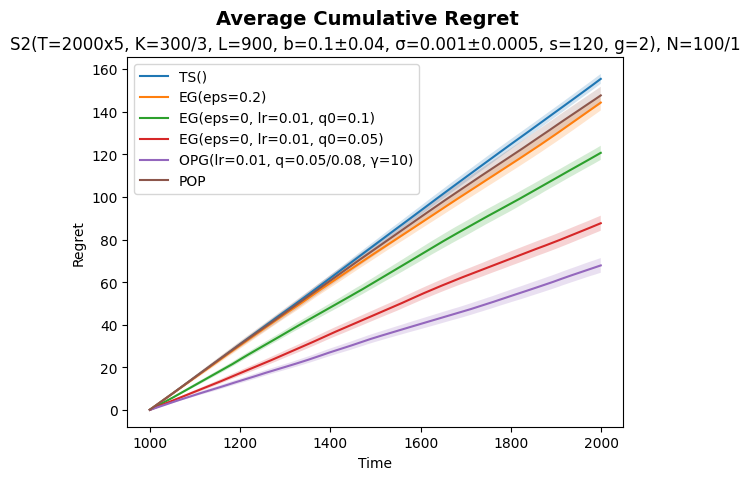

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 S2(T=2000x50, K=300/3, L=900, b=0.1±0.04, σ=0.001±0.0005, s=120, g=2) 
     0.931 ±0.003      - OPG(lr=0.005, q=0.05/0.1, γ=10)
     0.888 ±0.005      - EG(eps=0, lr=0.01, q0=0.05)
     0.852 ±0.004      - EG(eps=0, lr=0.01, q0=0.1)
     0.781 ±0.006      - TS()
     0.740 ±0.013      - POP
     0.670 ±0.010      - EG(eps=0.1)



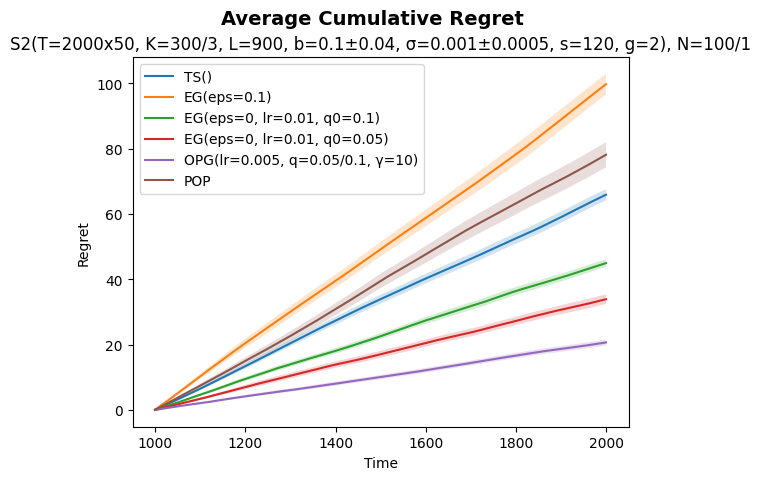

In [6]:
def experiment4():
#     sim1 = Simulator(run_count=100, seed_change_interval=1)
#     sim1.set_setting(setting)
#     sim1.set_episode_length(5)
#     sim1.run_oracle()
#     sim1.run_agent(PopAgent, {'noise': 3})
#     sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.1, 'gamma': 1})
#     sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.1, 'gamma': 2})
#     sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.1, 'gamma': 5})
#     sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.1, 'gamma': 10})
#     sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.1, 'gamma': 25})
#     sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.02, 'q0': 0.05, 'q1': 0.1, 'gamma': 10})
#     sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.005, 'q0': 0.05, 'q1': 0.1, 'gamma': 10})
#     sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.08, 'gamma': 10})
#     sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.12, 'gamma': 10})
#     sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.04, 'q1': 0.1, 'gamma': 10})
#     sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.06, 'q1': 0.1, 'gamma': 10})
#     sim1.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
#     sim1.results.ctrs(tmin=1000, relative=True)
    
#     sim2 = Simulator(run_count=100, seed_change_interval=1)
#     sim2.set_setting(setting)
#     sim2.set_episode_length(50)
#     sim2.run_oracle()
#     sim2.run_agent(PopAgent, {'noise': 1.5})
#     sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.01, 'q0': 0.05, 'q1': 0.1, 'gamma': 1})
#     sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.01, 'q0': 0.05, 'q1': 0.1, 'gamma': 2})
#     sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.01, 'q0': 0.05, 'q1': 0.1, 'gamma': 5})
#     sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.01, 'q0': 0.05, 'q1': 0.1, 'gamma': 10})
#     sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.01, 'q0': 0.05, 'q1': 0.1, 'gamma': 25})
#     sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.02, 'q0': 0.05, 'q1': 0.1, 'gamma': 10})
#     sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.005, 'q0': 0.05, 'q1': 0.1, 'gamma': 10})
#     sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.01, 'q0': 0.05, 'q1': 0.08, 'gamma': 10})
#     sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.01, 'q0': 0.05, 'q1': 0.12, 'gamma': 10})
#     sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.01, 'q0': 0.04, 'q1': 0.1, 'gamma': 10})
#     sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.01, 'q0': 0.06, 'q1': 0.1, 'gamma': 10})
#     sim2.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
#     sim2.results.ctrs(tmin=1000, relative=True)
    
    sim3 = Simulator(run_count=100, seed_change_interval=1)
    sim3.set_setting(setting)
    sim3.set_episode_length(5)
    sim3.run_oracle()
    sim3.run_agent(ThompsonAgent, {})
    sim3.run_agent(EpsGreedyAgent, {'eps': 0.2})
    sim3.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.1)})
    sim3.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.05)})
    sim3.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.08, 'gamma': 10})
    sim3.run_agent(PopAgent, {'noise': 3})
    sim3.results.ctrs(tmin=1000, relative=True, sort=True)
    sim3.results.create_regret_plot(tmin=1000)
    
    sim4 = Simulator(run_count=100, seed_change_interval=1)
    sim4.set_setting(setting)
    sim4.set_episode_length(50)
    sim4.run_oracle()
    sim4.run_agent(ThompsonAgent, {})
    sim4.run_agent(EpsGreedyAgent, {'eps': 0.1})
    sim4.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.1)})
    sim4.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.05)})
    sim4.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.005, 'q0': 0.05, 'q1': 0.1, 'gamma': 10})
    sim4.run_agent(PopAgent, {'noise': 1.5})
    sim4.results.ctrs(tmin=1000, relative=True, sort=True)
    sim4.results.create_regret_plot(tmin=1000)
    
experiment4()

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

 S2(T=2000x100, K=300/3, L=900, b=0.005±0.002, σ=0.001±0.0005, s=120, g=2) 
$0.471 \pm 0.007$ & TS() 
$0.519 \pm 0.018$ & EG(eps=0.2) 
$0.595 \pm 0.015$ & EG(eps=0, lr=0.0005, q0=0.005) 
$0.702 \pm 0.017$ & EG(eps=0, lr=0.0005, q0=0.0025) 
$0.757 \pm 0.017$ & OPG(lr=0.0005, q=0.0025/0.004, γ=10) 
$0.516 \pm 0.023$ & POP 



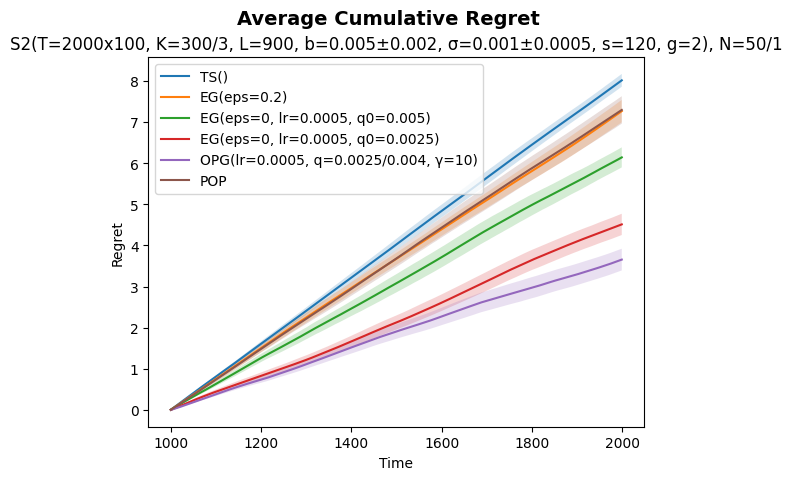

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
def experiment_full():
    full_setting = NewsSimulationSetting2(
        SettingConfig(
            episode_count=2000, 
            item_count=300, 
            k=3, 
            episode_length=1
        ),
        lifetime=900,
        ctr_base=0.005,
        ctr_fuzz=0.002,
        sigma_base=0.001,
        sigma_fuzz=0.0005,
        smoothing=120,
        global_evolution=2
    )
    
    sim1 = Simulator(run_count=50, seed_change_interval=1)
    sim1.set_setting(full_setting)
    sim1.set_episode_length(100)
    sim1.run_oracle()
    sim1.run_agent(ThompsonAgent, {})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0.2})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.0005, starting_value=0.005)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.0005, starting_value=0.0025)})
    sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.0005, 'q0': 0.0025, 'q1': 0.004, 'gamma': 10})
    sim1.run_agent(PopAgent, {'noise': 3})
    sim1.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    sim1.results.create_regret_plot(tmin=1000)

    sim2 = Simulator(run_count=50, seed_change_interval=1)
    sim2.set_setting(full_setting)
    sim2.set_episode_length(1000)
    sim2.run_oracle()
    sim2.run_agent(ThompsonAgent, {})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0.1})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.0005, starting_value=0.005)})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.0005, starting_value=0.0025)})
    sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.00025, 'q0': 0.0025, 'q1': 0.005, 'gamma': 10})
    sim2.run_agent(PopAgent, {'noise': 1.5})
    sim2.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    sim2.results.create_regret_plot(tmin=1000)
    
experiment_full()

In [ ]:
def experiment_delayed():
    sim1 = Simulator(run_count=100, seed_change_interval=1)
    sim1.set_setting(setting)
    sim1.set_episode_length(5)
    sim1.run_oracle()
    ips = 5*3 # impressions per episode = episode length * k
    sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.08, 'gamma': 10})
    sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.08, 'gamma': 10, 'update_interval': 1*ips})
    sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.08, 'gamma': 10, 'update_interval': 2*ips})
    sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.08, 'gamma': 10, 'update_interval': 5*ips})
    sim1.run_agent(OPGAgent, {'noise': 3, 'lr': 0.01, 'q0': 0.05, 'q1': 0.08, 'gamma': 10, 'update_interval': 10*ips})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.1)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.01, update_interval=1*ips, starting_value=0.1)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.01, update_interval=2*ips, starting_value=0.1)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.01, update_interval=5*ips, starting_value=0.1)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.01, update_interval=10*ips, starting_value=0.1)})
    sim1.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    sim1.results.create_regret_plot(tmin=1000)
    
    sim2 = Simulator(run_count=100, seed_change_interval=1)
    sim2.set_setting(setting)
    sim2.set_episode_length(50)
    sim2.run_oracle()
    ips = 50*3
    sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.005, 'q0': 0.05, 'q1': 0.1, 'gamma': 10 })
    sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.005, 'q0': 0.05, 'q1': 0.1, 'gamma': 10, 'update_interval': 1*ips})
    sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.005, 'q0': 0.05, 'q1': 0.1, 'gamma': 10, 'update_interval': 2*ips})
    sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.005, 'q0': 0.05, 'q1': 0.1, 'gamma': 10, 'update_interval': 5*ips})
    sim2.run_agent(OPGAgent, {'noise': 1.5, 'lr': 0.005, 'q0': 0.05, 'q1': 0.1, 'gamma': 10, 'update_interval': 10*ips})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.01, starting_value=0.1)})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.01, update_interval=1*ips, starting_value=0.1)})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.01, update_interval=2*ips, starting_value=0.1)})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.01, update_interval=5*ips, starting_value=0.1)})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.01, update_interval=10*ips, starting_value=0.1)})
    sim2.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    sim2.results.create_regret_plot(tmin=1000)
    
# experiment_delayed()

In [21]:
def experiment_full_delayed():
    full_setting = NewsSimulationSetting2(
        SettingConfig(
            episode_count=2000, 
            item_count=300, 
            k=3, 
            episode_length=1
        ),
        lifetime=900,
        ctr_base=0.005,
        ctr_fuzz=0.002,
        sigma_base=0.001,
        sigma_fuzz=0.0005,
        smoothing=120,
        global_evolution=2
    )
    
    sim1 = Simulator(run_count=50, seed_change_interval=1)
    sim1.set_setting(full_setting)
    sim1.set_episode_length(100)
    sim1.run_oracle()
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.0005, starting_value=0.005)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.0005, update_interval=1*100, starting_value=0.005)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.0005, update_interval=5*100, starting_value=0.005)})
    sim1.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.0005, update_interval=20*100, starting_value=0.005)})
    sim1.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    sim1.results.create_regret_plot(tmin=1000)
    
    sim2 = Simulator(run_count=50, seed_change_interval=1)
    sim2.set_setting(full_setting)
    sim2.set_episode_length(1000)
    sim2.run_oracle()
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': WeightedCTREstimator(learning_rate=0.0005, starting_value=0.005)})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.0005, update_interval=1*1000, starting_value=0.005)})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.0005, update_interval=5*1000, starting_value=0.005)})
    sim2.run_agent(EpsGreedyAgent, {'eps': 0, 'estimator': DelayedWeightedCTREstimator(learning_rate=0.0005, update_interval=20*1000, starting_value=0.005)})
    sim2.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    sim2.results.create_regret_plot(tmin=1000)
    
# experiment_full_delayed()

In [37]:
def experiment_ucb():
    sim1 = Simulator(run_count=100, seed_change_interval=1)
    sim1.set_setting(setting)
    sim1.set_episode_length(5)
    sim1.run_oracle()
    sim1.run_agent(UCBAgent, {'c': 0.15, 'estimator': CTREstimator()})
    sim1.run_agent(UCBAgent, {'c': 0.1, 'estimator': CTREstimator()})
    sim1.run_agent(UCBAgent, {'c': 0.05, 'estimator': CTREstimator()})
    sim1.run_agent(UCBAgent, {'c': 0.15, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(UCBAgent, {'c': 0.1, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(UCBAgent, {'c': 0.05, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim1.run_agent(UCBAgent, {'c': 0.15, 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(UCBAgent, {'c': 0.1, 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(UCBAgent, {'c': 0.05, 'estimator': WindowedCTREstimator(window_size=5000)})
    sim1.run_agent(UCBAgent, {'c': 0.15, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim1.run_agent(UCBAgent, {'c': 0.1, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim1.run_agent(UCBAgent, {'c': 0.05, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim1.run_agent(UCBAgent, {'c': 0.15, 'estimator': WeightedCTREstimator(learning_rate=0.05)})
    sim1.run_agent(UCBAgent, {'c': 0.15, 'estimator': WeightedCTREstimator(learning_rate=0.01)})
    sim1.run_agent(UCBAgent, {'c': 0.15, 'estimator': WeightedCTREstimator(learning_rate=0.005)})
    sim1.run_agent(UCBAgent, {'c': 0.1, 'estimator': WeightedCTREstimator(learning_rate=0.05)})
    sim1.run_agent(UCBAgent, {'c': 0.1, 'estimator': WeightedCTREstimator(learning_rate=0.01)})
    sim1.run_agent(UCBAgent, {'c': 0.1, 'estimator': WeightedCTREstimator(learning_rate=0.005)})
    sim1.run_agent(UCBAgent, {'c': 0.05, 'estimator': WeightedCTREstimator(learning_rate=0.05)})
    sim1.run_agent(UCBAgent, {'c': 0.05, 'estimator': WeightedCTREstimator(learning_rate=0.01)})
    sim1.run_agent(UCBAgent, {'c': 0.05, 'estimator': WeightedCTREstimator(learning_rate=0.005)})
    sim1.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    sim1.results.ctrs(tmin=1000, relative=True)

    sim2 = Simulator(run_count=100, seed_change_interval=1)
    sim2.set_setting(setting)
    sim2.set_episode_length(50)
    sim2.run_oracle()
    sim2.run_agent(UCBAgent, {'c': 0.5, 'estimator': CTREstimator()})
    sim2.run_agent(UCBAgent, {'c': 0.25, 'estimator': CTREstimator()})
    sim2.run_agent(UCBAgent, {'c': 0.1, 'estimator': CTREstimator()})
    sim2.run_agent(UCBAgent, {'c': 0.5, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim2.run_agent(UCBAgent, {'c': 0.25, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim2.run_agent(UCBAgent, {'c': 0.1, 'estimator': WindowedCTREstimator(window_size=1000)})
    sim2.run_agent(UCBAgent, {'c': 0.5, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim2.run_agent(UCBAgent, {'c': 0.25, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim2.run_agent(UCBAgent, {'c': 0.1, 'estimator': WindowedCTREstimator(window_size=10000)})
    sim2.run_agent(UCBAgent, {'c': 0.5, 'estimator': WindowedCTREstimator(window_size=100000)})
    sim2.run_agent(UCBAgent, {'c': 0.25, 'estimator': WindowedCTREstimator(window_size=100000)})
    sim2.run_agent(UCBAgent, {'c': 0.1, 'estimator': WindowedCTREstimator(window_size=100000)})
    sim2.run_agent(UCBAgent, {'c': 0.5, 'estimator': WeightedCTREstimator(learning_rate=0.05)})
    sim2.run_agent(UCBAgent, {'c': 0.5, 'estimator': WeightedCTREstimator(learning_rate=0.01)})
    sim2.run_agent(UCBAgent, {'c': 0.5, 'estimator': WeightedCTREstimator(learning_rate=0.005)})
    sim2.run_agent(UCBAgent, {'c': 0.25, 'estimator': WeightedCTREstimator(learning_rate=0.05)})
    sim2.run_agent(UCBAgent, {'c': 0.25, 'estimator': WeightedCTREstimator(learning_rate=0.01)})
    sim2.run_agent(UCBAgent, {'c': 0.25, 'estimator': WeightedCTREstimator(learning_rate=0.005)})
    sim2.run_agent(UCBAgent, {'c': 0.1, 'estimator': WeightedCTREstimator(learning_rate=0.05)})
    sim2.run_agent(UCBAgent, {'c': 0.1, 'estimator': WeightedCTREstimator(learning_rate=0.01)})
    sim2.run_agent(UCBAgent, {'c': 0.1, 'estimator': WeightedCTREstimator(learning_rate=0.005)})
    sim2.results.ctrs(tmin=1000, relative=True, sort=False, latex=True)
    sim2.results.ctrs(tmin=1000, relative=True)
    
experiment_ucb()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 S2(T=2000x5, K=300/3, L=900, b=0.1±0.04, σ=0.001±0.0005, s=120, g=2) 
$0.659 \pm 0.012$ & UCBAgentUCB(c=0.15) 
$0.658 \pm 0.011$ & UCBAgentUCB(c=0.1) 
$0.594 \pm 0.016$ & UCBAgentUCB(c=0.05) 
$0.321 \pm 0.002$ & UCBAgentUCB(c=0.15, ws=1000) 
$0.371 \pm 0.004$ & UCBAgentUCB(c=0.1, ws=1000) 
$0.522 \pm 0.010$ & UCBAgentUCB(c=0.05, ws=1000) 
$0.513 \pm 0.008$ & UCBAgentUCB(c=0.15, ws=5000) 
$0.585 \pm 0.010$ & UCBAgentUCB(c=0.1, ws=5000) 
$0.599 \pm 0.012$ & UCBAgentUCB(c=0.05, ws=5000) 
$0.580 \pm 0.010$ & UCBAgentUCB(c=0.15, ws=10000) 
$0.605 \pm 0.012$ & UCBAgentUCB(c=0.1, ws=10000) 
$0.577 \pm 0.014$ & UCBAgentUCB(c=0.05, ws=10000) 
$0.486 \pm 0.007$ & UCBAgentUCB(c=0.15, lr=0.05) 
$0.650 \pm 0.011$ & UCBAgentUCB(c=0.15, lr=0.01) 
$0.631 \pm 0.009$ & UCBAgentUCB(c=0.15, lr=0.005) 
$0.520 \pm 0.009$ & UCBAgentUCB(c=0.1, lr=0.05) 
$0.679 \pm 0.011$ & UCBAgentUCB(c=0.1, lr=0.01) 
$0.645 \pm 0.011$ & UCBAgentUCB(c=0.1, lr=0.005) 
$0.591 \pm 0.010$ & UCBAgentUCB(c=0.05, lr=0.05) 
$0.661 \

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 S2(T=2000x50, K=300/3, L=900, b=0.1±0.04, σ=0.001±0.0005, s=120, g=2) 
$0.784 \pm 0.005$ & UCBAgentUCB(c=0.5) 
$0.818 \pm 0.007$ & UCBAgentUCB(c=0.25) 
$0.732 \pm 0.011$ & UCBAgentUCB(c=0.1) 
$0.281 \pm 0.001$ & UCBAgentUCB(c=0.5, ws=1000) 
$0.297 \pm 0.001$ & UCBAgentUCB(c=0.25, ws=1000) 
$0.388 \pm 0.003$ & UCBAgentUCB(c=0.1, ws=1000) 
$0.331 \pm 0.002$ & UCBAgentUCB(c=0.5, ws=10000) 
$0.547 \pm 0.005$ & UCBAgentUCB(c=0.25, ws=10000) 
$0.800 \pm 0.006$ & UCBAgentUCB(c=0.1, ws=10000) 
$0.686 \pm 0.004$ & UCBAgentUCB(c=0.5, ws=100000) 
$0.790 \pm 0.006$ & UCBAgentUCB(c=0.25, ws=100000) 
$0.723 \pm 0.011$ & UCBAgentUCB(c=0.1, ws=100000) 
$0.436 \pm 0.007$ & UCBAgentUCB(c=0.5, lr=0.05) 
$0.600 \pm 0.008$ & UCBAgentUCB(c=0.5, lr=0.01) 
$0.689 \pm 0.007$ & UCBAgentUCB(c=0.5, lr=0.005) 
$0.479 \pm 0.008$ & UCBAgentUCB(c=0.25, lr=0.05) 
$0.748 \pm 0.006$ & UCBAgentUCB(c=0.25, lr=0.01) 
$0.848 \pm 0.004$ & UCBAgentUCB(c=0.25, lr=0.005) 
$0.575 \pm 0.008$ & UCBAgentUCB(c=0.1, lr=0.05) 
$0.872

# Testing

In [33]:
sim = Simulator(run_count=100, seed_change_interval=1)
sim.set_setting(setting)
sim.set_episode_length(5)
sim.run_oracle()
None

In [34]:
sim.run_agent(UCBAgent, {'c': 0.1, 'estimator': WeightedCTREstimator(learning_rate=0.05)})
sim.run_agent(UCBAgent, {'c': 0.1, 'estimator': WeightedCTREstimator(learning_rate=0.01)})
sim.run_agent(UCBAgent, {'c': 0.1, 'estimator': WeightedCTREstimator(learning_rate=0.005)})
None

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 S2(T=2000x5, K=300/3, L=900, b=0.1±0.04, σ=0.001±0.0005, s=120, g=2) 
     0.692 ±0.011      - UCBAgentUCB(c=0.1, lr=0.01)
     0.628 ±0.009      - UCBAgentUCB(c=0.1, lr=0.005)
     0.522 ±0.008      - UCBAgentUCB(c=0.1, lr=0.05)



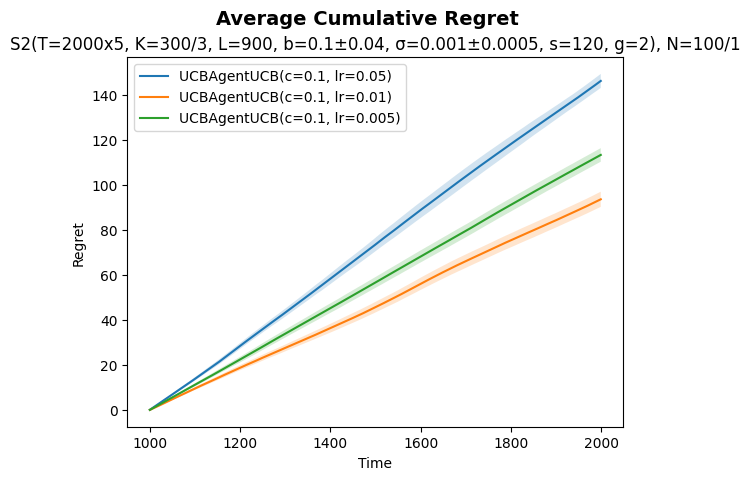

In [35]:
sim.results.ctrs(tmin=1000, relative=True, sort=True)
sim.results.create_regret_plot(tmin=1000)